# Exercise 2

Consider the following function (where $ \mathbf{x} = (x, y) $):

$$
f(\mathbf{x}) = 5x^2 - 6xy + 5y^2 + 4x + 4y \tag{1}
$$

In [2]:
def f(x):
    x,y = x
    return 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y

### 1. Plot the function.
- Visualize the function to understand its behavior over the $x$-$y$ plane.


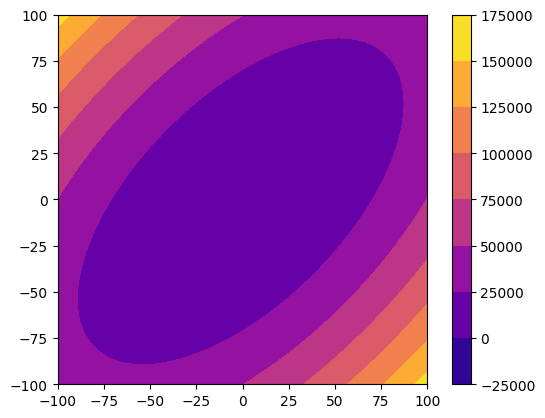

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

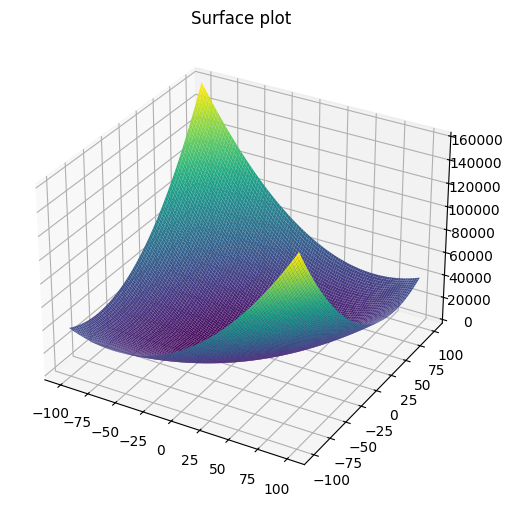

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)

X, Y = np.meshgrid(x,y)
Z=f((X,Y))

fig= plt.figure()
plt.contourf(X, Y, Z, cmap='plasma')
plt.axis('scaled')
plt.colorbar()
plt.show()
plt.figure(figsize=(8, 6))

fig= plt.figure()
plt.figure(figsize=(8, 6))
# use 3d plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

### 2. Compute analytically the value $\mathbf{x}_{\min}$ where the function attains its minimum value and $f(\mathbf{x}_{\min})$.
- Solve for the minimum analytically by finding the gradient of $f$ and equating it to zero.




The given function is:
$$
f(\mathbf{x}) = 5x^2 - 6xy + 5y^2 + 4x + 4y
$$

### Compute the Gradient
To find the critical point (minimum), we compute the gradient $ \nabla f(\mathbf{x}) $:
$$
\nabla f(\mathbf{x}) = 
\begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{bmatrix}
$$

#### Partial derivatives:
$$
\frac{\partial f}{\partial x} = 10x - 6y + 4
$$
$$
\frac{\partial f}{\partial y} = -6x + 10y + 4
$$

Thus, the gradient is:
$$
\nabla f(\mathbf{x}) =
\begin{bmatrix}
10x - 6y + 4 \\
-6x + 10y + 4
\end{bmatrix}
$$


###  Solve $ \nabla f(\mathbf{x}) = 0 $
At the minimum, the gradient is zero:
$$
\begin{bmatrix}
10x - 6y + 4 \\
-6x + 10y + 4
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

This gives the system of equations:
1. $ 10x - 6y + 4 = 0 $
2. $ -6x + 10y + 4 = 0 $

From equation (1):
$$
10x - 6y = -4 \quad \Rightarrow \quad 5x - 3y = -2 \tag{A}
$$

From equation (2):
$$
-6x + 10y = -4 \quad \Rightarrow \quad -3x + 5y = -2 \tag{B}
$$

Now solve equations (A) and (B):
$$
5x - 3y = -2 \tag{A}
$$
$$
-3x + 5y = -2 \tag{B}
$$

Multiply (A) by 5 and (B) by 3 to eliminate $ y $:
$$
25x - 15y = -10 \quad \text{(from A)}
$$
$$
-9x + 15y = -6 \quad \text{(from B)}
$$

Add these equations:
$$
25x - 9x = -10 - 6 \quad \Rightarrow \quad 16x = -16 \quad \Rightarrow \quad x = -1
$$

Substitute $ x = -1 $ into (A):
$$
5(-1) - 3y = -2 \quad \Rightarrow \quad -5 - 3y = -2 \quad \Rightarrow \quad -3y = 3 \quad \Rightarrow \quad y = -1
$$

Thus:
$$
\mathbf{x}_{\min} = (-1, -1)
$$


Substitute $ x = -1 $ and $ y = -1 $ into $ f(\mathbf{x}) $:
$$
f(-1, -1) = 5(-1)^2 - 6(-1)(-1) + 5(-1)^2 + 4(-1) + 4(-1)
$$
$$
f(-1, -1) = 5(1) - 6(1) + 5(1) - 4 - 4
$$
$$
f(-1, -1) = 5 - 6 + 5 - 8 = -4
$$


### Final Answer
The minimum value of $ f(\mathbf{x}) $ occurs at:
$$
\mathbf{x}_{\min} = (-1, -1)
$$
$$
f(\mathbf{x}_{\min}) = -4
$$


### 3. Write (1) as
$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T H \mathbf{x} + \mathbf{d}^T \mathbf{x} + c. \tag{2}
$$

Write explicitly the expressions for the matrix $H$, the vector $\mathbf{d}$, and the constant $c$. What is $H$?

- Decompose $f(\mathbf{x})$ into quadratic, linear, and constant terms to identify $H$, $\mathbf{d}$, and $c$:
  - $H$: The Hessian matrix of second-order partial derivatives.
  - $\mathbf{d}$: The gradient vector of linear terms.
  - $c$: Constant term.


In [37]:
def f(x):
    x,y = x
    return 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y

grad_x = lambda x,y: 10*x -6*y + 4
grad_y = lambda x,y: 10*y - 6*x + 4


def grad_func(x_vec):
    x, y = x_vec
    df_dx = 10*x -6*y + 4
    df_dy =  10*y - 6*x + 4
    grad = np.array([df_dx, df_dy])
    return grad

gradx_grady = -6
grady_gradx = -6
grad_grad_x = 10
grad_grad_y = 10

d = np.array([4,4])

c = 0

H = np.array([[grad_grad_x, gradx_grady],
                    [grady_gradx, grad_grad_y]])
def quadratic_f(x):
    return 0.5 * x.T @ H @ x + d.T @ x + c


### 4. Consider the gradient descent (GD) method
$$
\mathbf{x}^{k+1} = \mathbf{x}^k - \alpha \nabla f(\mathbf{x}^k), \tag{3}
$$

where $\alpha$ is the learning rate. Combining (2) and (3), find the expression of $\alpha_{\text{max}}$ (maximum value of $\alpha$) such that the GD method is convergent. 

**Hint**: Remember that for an iterative method to be convergent, the spectral radius $\rho$ of the iteration matrix must satisfy $\vert \rho \vert < 1$.

In [65]:
import jax
import jax.numpy as jnp

def gradient_descent(grad_func, x0, lr=0.01, tol=1e-6, max_iter=1000):
    x = x0
    path = [x]  # for visualization purposes only
    for _ in range(max_iter):
        grad_val = grad_func(x)
        x_prev = x
        x = x - lr * grad_val
        path.append(x)
        if jnp.abs(f(x) - f(x_prev)) < tol:
            break
    return x, path

### 4. Consider the gradient descent (GD) method

The spectral radius $ \rho $ is a property of the iteration matrix $ M $ that determines the convergence of the gradient descent method.

#### **What is $ \rho $?**

The **spectral radius** $ \rho(M) $ of a matrix $ M $ is defined as the largest absolute value of its eigenvalues:
$$
\rho(M) = \max \{ |\lambda| : \lambda \text{ is an eigenvalue of } M \}.
$$
**Why is $ \rho $ Important?**

For the **gradient descent method (GD)** to converge, the spectral radius $ \rho $ of the iteration matrix must satisfy:
$$
\rho < 1.
$$

1. Gradient descent updates can be written as:
$$
\mathbf{x}^{k+1} = \mathbf{x}^k - \alpha \nabla f(\mathbf{x}^k).
$$

2. Near the minimum, $ \nabla f(\mathbf{x}) = \mathbf{H} \mathbf{x} + \mathbf{d} $, so the update rule becomes:
$$
\mathbf{x}^{k+1} = (I - \alpha \mathbf{H}) \mathbf{x}^k.
$$

3. The iteration matrix is:
$$
M = I - \alpha \mathbf{H},
$$
where $ I $ is the identity matrix and $ \mathbf{H} $ is the Hessian matrix of $ f(x) $.

**Finding $ \alpha_{\text{max}} $**

To determine the maximum learning rate $ \alpha_{\text{max}} $ such that $ \rho(M) < 1 $:

1. The eigenvalues of $ M $ are:
$$
\lambda_M = 1 - \alpha \lambda_H,
$$
where $ \lambda_H $ are the eigenvalues of the Hessian matrix $ \mathbf{H} $.

2. The condition $ |\lambda_M| < 1 $ becomes:
$$
|1 - \alpha \lambda_H| < 1.
$$

3. Solve for $ \alpha $:
$$
-1 < 1 - \alpha \lambda_H < 1 \implies 0 < \alpha < \frac{2}{\lambda_H}.
$$

4. The most restrictive $ \alpha_{\text{max}} $ occurs for the largest eigenvalue $ \lambda_{\text{max}} $ of $ \mathbf{H} $:
$$
\alpha_{\text{max}} = \frac{2}{\lambda_{\text{max}}}.
$$

- The spectral radius $ \rho $ ensures convergence by bounding the eigenvalues of the iteration matrix $ M = I - \alpha \mathbf{H} $.
- The maximum learning rate is:
$$
\alpha_{\text{max}} = \frac{2}{\lambda_{\text{max}}}.
$$



### 5. Find the value of $\alpha_{\text{max}}$ for the GD method applied to (1).

- Derive $\alpha_{\text{max}}$ explicitly for the given function.

### 6. Implement the GD method and verify the conclusion drawn at the previous point. 

- Use the stopping criterion $E < \epsilon$, where $E$ is the absolute value of the difference of the last two functional values:
  $$
  E = \vert f(\mathbf{x}^{k+1}) - f(\mathbf{x}^k) \vert. \tag{4}
  $$

- Take $\epsilon = 10^{-3}$ and $\alpha = \alpha_{\text{max}} / 2$. Use an initial guess equal to $\mathbf{x}^0 = (-5, 7)$.

- Set the maximum number of iterations to 200.

In [10]:
eigenvalues = np.linalg.eig(H)
eigenvalues

EigResult(eigenvalues=array([16.,  4.]), eigenvectors=array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))

In [15]:
eigenvalues = np.linalg.eig(H).eigenvalues
max = float('-inf')
for el in eigenvalues:
    if el > max:
        max = el
alpha_max = 2/max
print(alpha_max)

0.125


In [42]:
grad_func(np.array([2,4]))

array([ 0, 32])

In [69]:
# Set other parameters
x0 = np.array([-5, 7])
epsilon = 1e-20
histories = {}
# Run gradient descent
print("testing maximum alpha")
result, path1 = gradient_descent(grad_func, x0, lr=0.99*alpha_max, tol=epsilon)
print("Optimal x:", result)
print("Minimum value of f(x):", f(result))
histories["0.99*alpha_max"] = path1

print("\ntesting alpha over maximum")
result, path2 = gradient_descent(grad_func, x0, lr=1.01*alpha_max, tol=epsilon)
print("Optimal x:", result)
print("Minimum value of f(x):", f(result))
histories["1.01**alpha_max"] = path2

print("\ntesting heuristically good alpha")
result, path3 = gradient_descent(grad_func, x0, lr=alpha_max/2, tol=epsilon)
print("Optimal x:", result)
print("Minimum value of f(x):", f(result))
histories["alpha_max/2"] = path3


testing maximum alpha
Optimal x: [-0.99999996 -1.00000004]
Minimum value of f(x): -3.999999999999979

testing alpha over maximum
Optimal x: [-2.38958791e+09  2.38958791e+09]
Minimum value of f(x): 9.136208606997694e+19

testing heuristically good alpha
Optimal x: [-0.99999998 -0.99999998]
Minimum value of f(x): -3.9999999999999973


[-5, 0.5, 0.125, -0.15625, -0.3671875, -0.525390625, -0.64404296875, -0.7330322265625, -0.799774169921875, -0.8498306274414062, -0.8873729705810547, -0.915529727935791, -0.9366472959518433, -0.9524854719638824, -0.9643641039729118, -0.9732730779796839, -0.9799548084847629, -0.9849661063635722, -0.9887245797726791, -0.9915434348295094, -0.993657576122132, -0.995243182091599, -0.9964323865686993, -0.9973242899265244, -0.9979932174448933, -0.99849491308367, -0.9988711848127525, -0.9991533886095643, -0.9993650414571733, -0.9995237810928801, -0.9996428358196601, -0.999732126864745, -0.9997990951485587, -0.999849321361419, -0.9998869910210644, -0.9999152432657983, -0.9999364324493487, -0.9999523243370114, -0.9999642432527587, -0.999973182439569, -0.9999798868296768, -0.9999849151222575, -0.9999886863416931, -0.9999915147562699, -0.9999936360672024, -0.9999952270504018, -0.9999964202878013, -0.999997315215851, -0.9999979864118882, -0.9999984898089163, -0.9999988673566871, -0.9999991505175152,

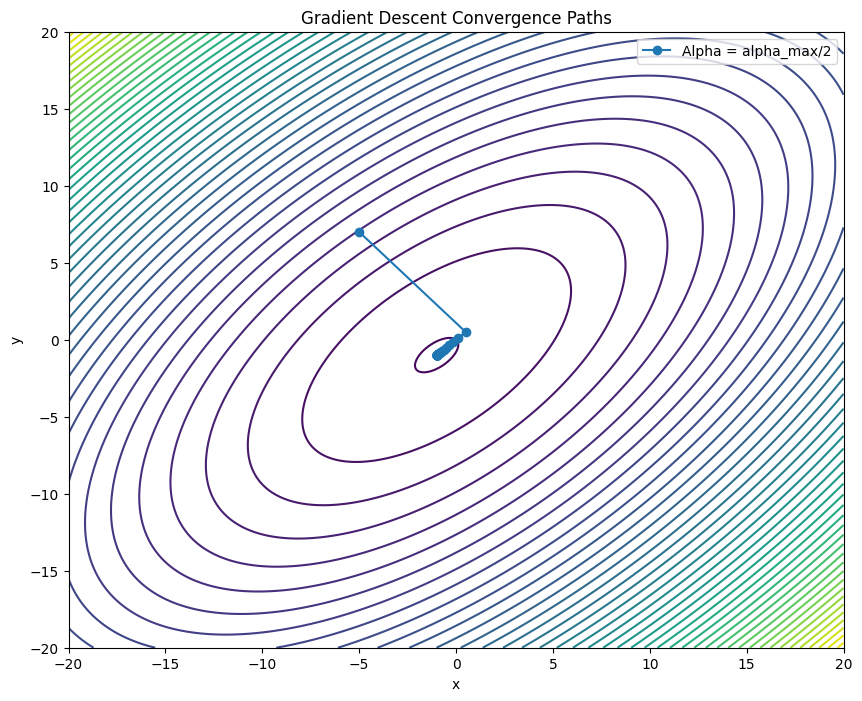

In [83]:
plt.figure(figsize=(10, 8))
x = np.linspace(-20, 20, 500)
y = np.linspace(-20, 20, 500)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Plot the function
plt.contour(X, Y, Z, levels=50, cmap='viridis')

x_vals = [p[0] for p in histories["alpha_max/2"]]  # Extract x values
print(x_vals)
y_vals = [p[1] for p in histories["alpha_max/2"]]  # Extract y values
plt.plot(x_vals, y_vals, marker='o', label="Alpha = alpha_max/2")
plt.title("Gradient Descent Convergence Paths")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()